![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [3]:
def present_value(cash_flow, interest_rate, time_period):
    """
    Calculates the present value of a cash flow.

    Parameters:
    cash_flow (float): The cash flow amount.
    interest_rate (float): The interest rate.
    time_period (int): The time period.

    Returns:
    float: The present value of the cash flow.
    """
    present_value = cash_flow / (1 + interest_rate) ** time_period
    return present_value



pv = present_value(100, 0.03, 10)
print(f"The present value is: {pv:.2f}")


The present value is: 74.41


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

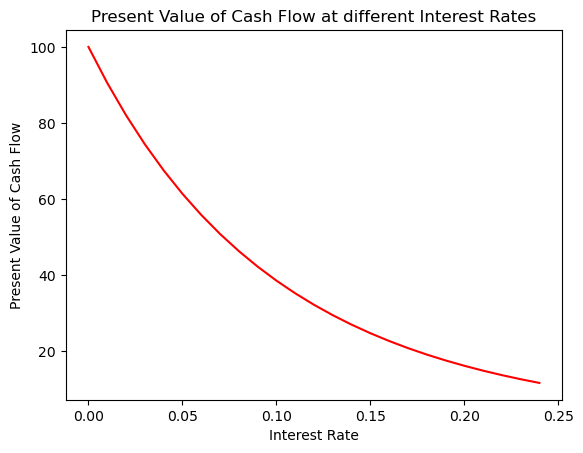

In [4]:
import matplotlib.pyplot as plt
import numpy as np
cash_flow = 100
time_period = 10

x = np.arange(0, 0.25, 0.01)
y = present_value(cash_flow, x, time_period)
plt.plot(x, y, color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Present Value of Cash Flow')
plt.title('Present Value of Cash Flow at different Interest Rates')
plt.show()

### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [5]:
# Grundidee 
'''
--> leider falsch, da es sich hierbei um die Berechnung des Present Value für 3 Jahre handelt und nicht um die Berechnung des Present Value für 3 Zahlungen
print(present_value(10, 0.05 , 3))
print(present_value(10, 0.05 , 2))
print(present_value(110, 0.05 , 1))

-->korrekt wäre
print(present_value(10, 0.05 , 1))
print(present_value(10, 0.05 , 2))
print(present_value(110, 0.05 , 3))
'''

# New solution
pres_val = 0
payments = [10, 10, 110]
counter = 0
for payment in payments:
    new_pres_val = present_value(payment, 0.05 , len(payments) - counter) + pres_val
    counter += 1
    pres_val = new_pres_val
print(f"The present value after three years with {payments} as annually payments is: {pres_val:.2f}")


The present value after three years with [10, 10, 110] as annually payments is: 122.47


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

In [6]:
import pandas as pd

# 1
prices = pd.read_csv('02_python_data.csv')

# Display the DataFrame
display(prices)


# 2
# settings arithmetic returns
returns = pd.DataFrame()
returns['Date'] = prices['Date']

# Calculate arithmetic returns
for column in prices.columns[1:]:
    returns[column] = prices[column].pct_change()

# Print the results
print("Arithmetic Returns:")
display(returns.head(5))


# 3
# settings logarithmic returns
logreturns = pd.DataFrame()
logreturns['Date'] = prices['Date']

# Calculate logarithmic returns
for column in prices.columns[1:]:
    logreturns[column] = np.log(1 + prices[column].pct_change())


# Print the results
print("Logarithmic Returns:")
display(logreturns.head(5))


,Date,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,2022-04-29,14097.88,97.026932,117.78,17.570,105.50,216.20,67.10,148.94,78.51,...,66.02,55.26,193.65,6.282,214.8,73.94,37.83,44.04,79.54,41.29
1,2022-05-02,13939.07,95.982669,115.12,17.290,103.96,215.00,62.22,147.22,77.64,...,62.46,54.74,187.90,6.204,211.6,72.30,37.74,44.01,77.48,41.41
2,2022-05-03,14039.47,94.729554,114.56,17.376,106.44,217.00,62.88,150.20,79.98,...,64.32,55.22,197.10,6.412,222.4,72.18,38.07,44.06,79.58,39.40
3,2022-05-04,13970.82,92.979171,115.78,17.530,102.68,213.55,62.33,148.52,79.47,...,63.30,55.42,192.30,6.310,213.1,72.48,37.15,43.34,78.32,40.20
4,2022-05-05,13902.52,94.699718,116.58,17.592,108.96,199.76,61.00,147.18,78.03,...,60.54,54.18,189.95,6.188,211.0,71.34,33.21,44.05,77.78,38.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-04-12,15703.60,116.620000,144.82,22.400,126.20,218.40,69.34,125.52,102.68,...,65.70,67.22,229.60,9.720,263.1,69.12,36.07,42.39,52.60,36.62
246,2023-04-13,15729.46,115.960000,144.28,22.305,125.90,219.10,69.79,126.08,102.32,...,66.18,67.94,231.90,9.806,265.4,69.28,36.99,42.40,52.50,35.86
247,2023-04-14,15807.50,115.960000,146.16,22.215,126.16,219.10,70.41,127.70,103.68,...,68.38,69.42,228.90,10.360,267.2,69.96,37.62,42.33,53.46,36.77
248,2023-04-17,15789.53,116.360000,147.06,22.345,128.10,216.50,69.25,126.90,103.20,...,69.10,70.18,234.60,10.000,267.0,70.48,37.31,42.06,52.54,37.14


Arithmetic Returns:


,Date,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,2022-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-02,-0.011265,-0.010763,-0.022584,-0.015936,-0.014597,-0.005550,-0.072727,-0.011548,-0.011081,...,-0.053923,-0.009410,-0.029693,-0.012416,-0.014898,-0.022180,-0.002379,-0.000681,-0.025899,0.002906
2,2022-05-03,0.007203,-0.013056,-0.004864,0.004974,0.023855,0.009302,0.010608,0.020242,0.030139,...,0.029779,0.008769,0.048962,0.033527,0.051040,-0.001660,0.008744,0.001136,0.027104,-0.048539
3,2022-05-04,-0.004890,-0.018478,0.010649,0.008863,-0.035325,-0.015899,-0.008747,-0.011185,-0.006377,...,-0.015858,0.003622,-0.024353,-0.015908,-0.041817,0.004156,-0.024166,-0.016341,-0.015833,0.020305
4,2022-05-05,-0.004889,0.018505,0.006910,0.003537,0.061161,-0.064575,-0.021338,-0.009022,-0.018120,...,-0.043602,-0.022375,-0.012220,-0.019334,-0.009855,-0.015728,-0.106057,0.016382,-0.006895,-0.036070


Logarithmic Returns:


,Date,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
0,2022-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-02,-0.011329,-0.010821,-0.022843,-0.016065,-0.014705,-0.005566,-0.075508,-0.011615,-0.011143,...,-0.055431,-0.009455,-0.030142,-0.012494,-0.015010,-0.022430,-0.002382,-0.000681,-0.026240,0.002902
2,2022-05-03,0.007177,-0.013142,-0.004876,0.004962,0.023575,0.009259,0.010552,0.020040,0.029694,...,0.029344,0.008731,0.047801,0.032977,0.049780,-0.001661,0.008706,0.001135,0.026743,-0.049757
3,2022-05-04,-0.004902,-0.018651,0.010593,0.008824,-0.035964,-0.016026,-0.008785,-0.011248,-0.006397,...,-0.015985,0.003615,-0.024655,-0.016036,-0.042716,0.004148,-0.024463,-0.016476,-0.015960,0.020101
4,2022-05-05,-0.004901,0.018336,0.006886,0.003531,0.059363,-0.066754,-0.021569,-0.009063,-0.018286,...,-0.044581,-0.022629,-0.012296,-0.019524,-0.009903,-0.015853,-0.112113,0.016249,-0.006919,-0.036736


### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

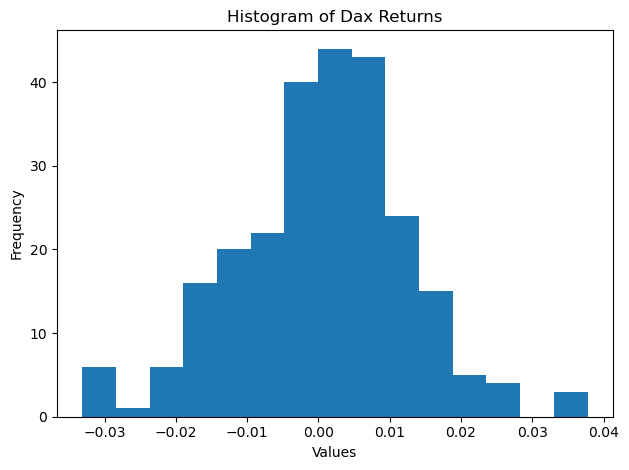

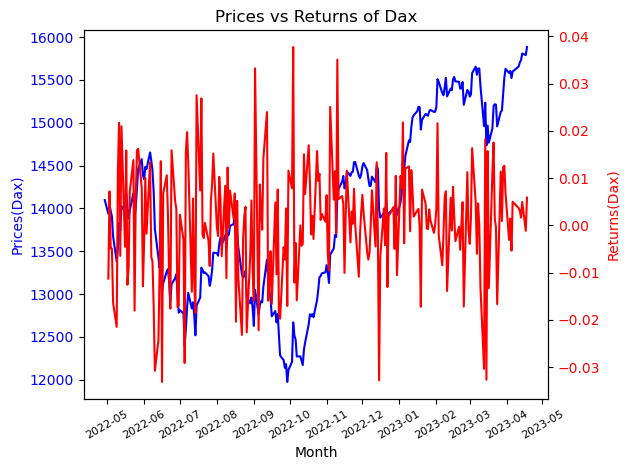

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
# 1

# Plotting the histogram
dax_hist = plt.hist(returns['.GDAXI'], bins=15) 

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Dax Returns')

# adjust size and save
plt.tight_layout()
plt.savefig('02_python_dax_histogram.png')
plt.show()

# 2

# Setting the axes

x = pd.to_datetime(prices['Date'])          # convert the date to datetime --> else the DateFormatter doesn't work       
y1 = prices['.GDAXI']
y2 = returns['.GDAXI']

# create the figure and subplots
fig, ax1 = plt.subplots()

# create a second y-axis
ax2 = ax1.twinx()

# plot the data on the first y-axis
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Prices(Dax)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# plot the data on the second y-axis
ax2.plot(x, y2, color='red')
ax2.set_ylabel('Returns(Dax)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set DateFormater for x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.tick_params(axis='x', labelrotation=30, labelsize=8)

# set the title of the plot
plt.title('Prices vs Returns of Dax')

# adjust size and save
plt.tight_layout()
plt.savefig('02_python_dax_prices_vs_returns.png')

# show the plot
plt.show()




### Task:

Which company had the highest average stock return during the time period covered by the data?

In [8]:

# calculate the average returns --> returns a pandas Series
returns_avg = returns.iloc[:,1:].mean()

# returning the index of the biggest value
index_of_biggest_value = returns_avg.idxmax()

print(f' {index_of_biggest_value} had the highest average stock return.' )


 CBKG.DE had the highest average stock return.


### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

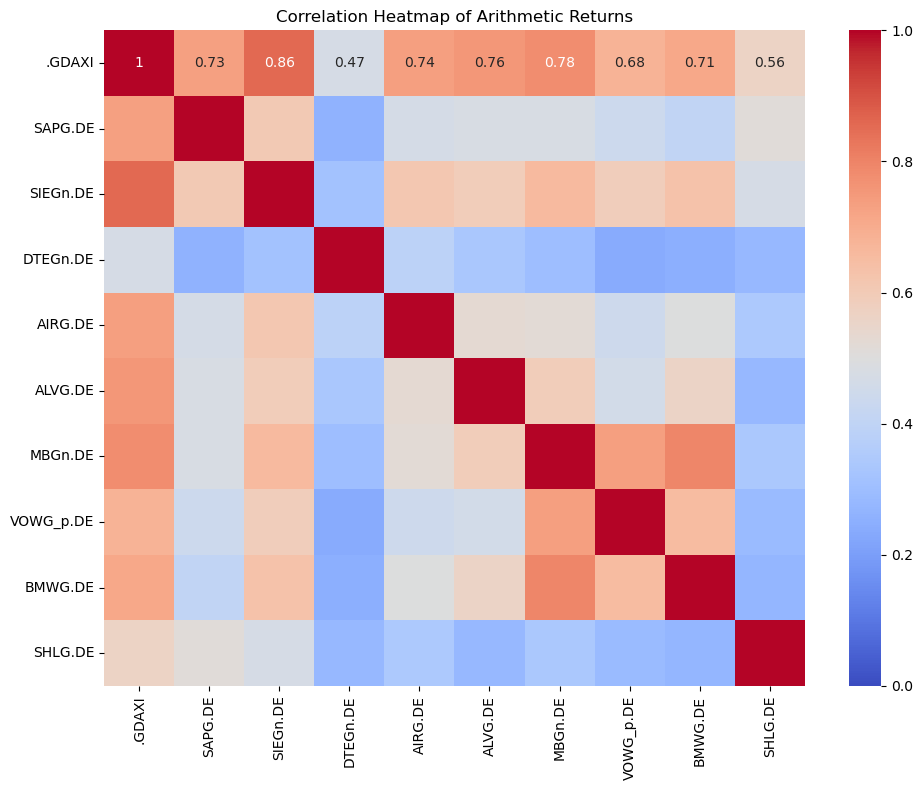

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the arithmetic returns are stored in a DataFrame called 'arithmetic_returns'
correlation_matrix = returns.iloc[1:, 1:11].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Heatmap of Arithmetic Returns')

# adjust size and save
plt.tight_layout()
plt.savefig('02_python_Heatmap_of_Arithmetic_Returns.png')

#show
plt.show()


### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

In [130]:
import pandas as pd

# first solution

# Create correlation matrix
corr_matrix = returns.iloc[1:, 1:].corr()

# unstack corr_matrix to get a series of all correlations
corr_series =corr_matrix.unstack().sort_values(ascending=False)

# convert Series to DataFrame 
corr_df = corr_series.reset_index()

# remove dubplicates 1/2
corr_unique_df = corr_df[corr_df['level_0'] != corr_df['level_1']]


# remove dublicates 2/2: combine level_0 and level_1 to a new column to eliminate duplicates
corr_unique_df_copy = corr_unique_df.copy()             # without copying the original DataFrame would be changed and we would get a warning
corr_unique_df_copy.loc[:,'combined'] = corr_unique_df_copy[['level_0', 'level_1']].apply(lambda x: '_'.join(sorted(x)), axis=1)
corr_cleaned_df = corr_unique_df_copy.drop_duplicates(subset=['combined'])

# print(corr_cleaned_df)
# Output the highest and lowest correlation
print(f"The highest correlation is between {corr_cleaned_df.iloc[0, 0]} and {corr_cleaned_df.iloc[0, 1]} with a correlation of {corr_cleaned_df.iloc[0, 2]:.2f}.")
print(f"The lowest correlation is between {corr_cleaned_df.iloc[-1, 0]} and {corr_cleaned_df.iloc[-1, 1]} with a correlation of {corr_cleaned_df.iloc[-1, 2]:.2f}.")

The highest correlation is between .GDAXI and SIEGn.DE with a correlation of 0.86.
The lowest correlation is between CBKG.DE and QIA.DE with a correlation of 0.01.


In [68]:
# Better/Cleaner solution
import numpy as np

# Fill correlation matrix with nan-Values to ignore the diagonal
np.fill_diagonal(corr_matrix.values, np.nan)

# find max and min value
max_value = np.nanmax(corr_matrix)
min_value = np.nanmin(corr_matrix)

# find the index of the max/min value
max_row_index, max_col_index = np.where(corr_matrix == max_value)
min_row_index, min_col_index = np.where(corr_matrix == min_value)

# extract the row and column name
max_row_name = corr_matrix.index[max_row_index[0]]
max_col_name = corr_matrix.columns[max_col_index[0]]
min_row_name = corr_matrix.index[min_row_index[0]]
min_col_name = corr_matrix.columns[min_col_index[0]]

# Result
print(f"The highest correlation is between {max_row_name} and {max_col_name} with a correlation of {max_value:.2f}.")
print(f"The lowest correlation is between {min_row_name} and {min_col_name} with a correlation of {min_value:.2f}.")


The highest correlation is between .GDAXI and SIEGn.DE with a correlation of 0.86.
The lowest correlation is between CBKG.DE and QIA.DE with a correlation of 0.01.


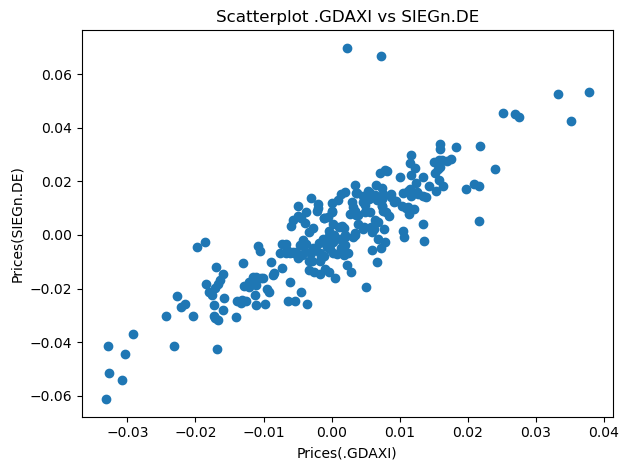

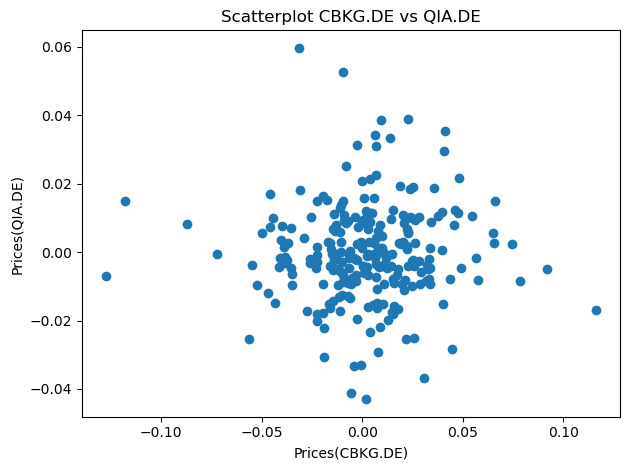

In [79]:
import matplotlib.pyplot as plt

# Max Scatterplot
# set axis
x = returns[max_row_name]
y = returns[max_col_name]

plt.scatter(x, y)

# Set the title and labels
plt.title(f'Scatterplot {max_row_name} vs {max_col_name}')
plt.xlabel(f'Prices({max_row_name})')
plt.ylabel(f'Prices({max_col_name})')

# adjust size and save
plt.tight_layout()
plt.savefig('02_python_Scatterplot_max_corr.png')

plt.show()


# Min Scatterplot
# set axis
x = returns[min_row_name]
y = returns[min_col_name]

plt.scatter(x, y)

# Set the title and labels
plt.title(f'Scatterplot {min_row_name} vs {min_col_name}')
plt.xlabel(f'Prices({min_row_name})')
plt.ylabel(f'Prices({min_col_name})')

# adjust size and save
plt.tight_layout()
plt.savefig('02_python_Scatterplot_min_corr.png')

plt.show()


### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

In [91]:
import pandas as pd
import numpy as np

# 1 
# Drop Date column
logreturns_wo_date = logreturns.drop(columns=['Date'])

# Calculate mean and standard deviation of log-returns for each asset
mean_log_returns = logreturns_wo_date.mean()
std_dev_log_returns = logreturns_wo_date.std()

# Calculate annualized return and volatility for each asset
trading_days_per_year = 252
annualized_return = mean_log_returns * trading_days_per_year
annualized_volatility = std_dev_log_returns * np.sqrt(trading_days_per_year)

# Create a new DataFrame to store the calculated values
result_df = pd.DataFrame({
    'Asset': mean_log_returns.index,
    'Annualized Volatility': annualized_volatility.values,
    'Annualized Return': annualized_return.values
})

# Print the new DataFrame
# display(result_df)



# 2
# Define risk-free rate
risk_free_rate = 0.005

# Calculate Sharpe ratio for each asset
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Add Sharpe ratio to the DataFrame
result_df['Sharpe Ratio'] = sharpe_ratio.values

# Print the updated DataFrame
display(result_df)


,Asset,Annualized Volatility,Annualized Return,Sharpe Ratio
0,.GDAXI,0.192007,0.120640,0.602271
1,SAPG.DE,0.243553,0.187016,0.747334
2,SIEGn.DE,0.313924,0.225660,0.702910
3,DTEGn.DE,0.169142,0.248276,1.438295
4,AIRG.DE,0.299162,0.197860,0.644667
5,ALVG.DE,0.225913,0.013023,0.035513
6,MBGn.DE,0.332984,0.045276,0.120954
7,VOWG_p.DE,0.346088,-0.164629,-0.490132
8,BMWG.DE,0.267520,0.285525,1.048615
9,SHLG.DE,0.310205,0.046686,0.134381


### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

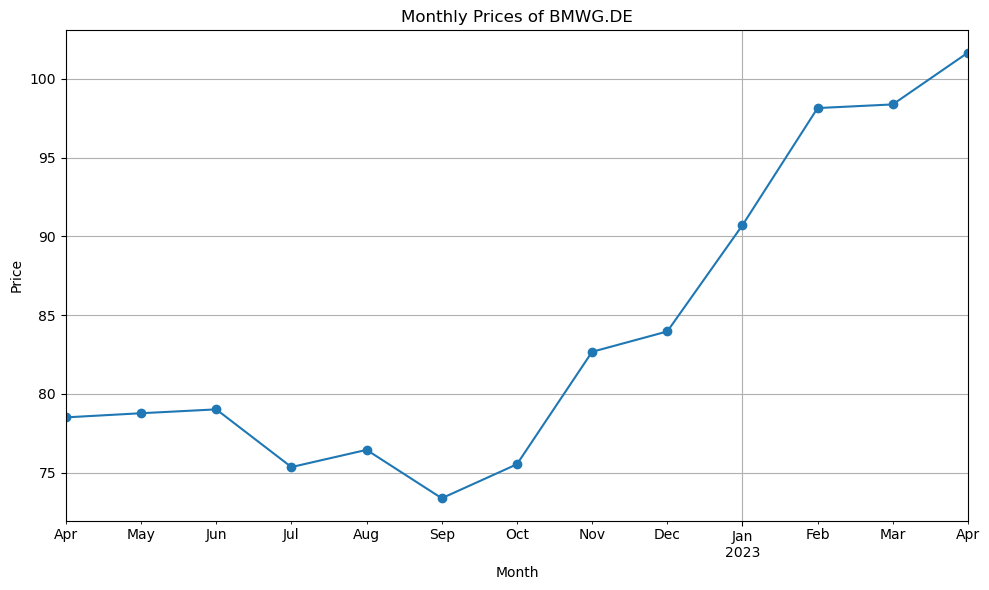

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime type
prices = pd.read_csv('02_python_data.csv')
prices['Date'] = pd.to_datetime(prices['Date'])

# Resample the data to monthly frequency
monthly_prices = prices.resample('M', on='Date').mean()


# Plot the monthly price of BMWG.DE
plt.figure(figsize=(10, 6))
monthly_prices['BMWG.DE'].plot(marker='o', linestyle='-')

plt.title('Monthly Prices of BMWG.DE')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(True)

# adjust size and save
plt.tight_layout()
plt.savefig('02_python_month_price_BMW_plot.png')

plt.show()
